In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
from folium import Map
from folium import Marker

# The Shape data of Districts in Boston
shape = pd.read_csv('../../data/shapefile.csv')

# The Shootings dashboard contains information on shooting incidents where a victim was struck by a bullet, either fatally or non-fatally
# date: 2015-2023
shootings=pd.read_csv('../../data/shootings.csv')

#
violence=pd.read_csv('../../data/violence.csv')

# crime incident reports
# crime_incident=pd.read_csv('../../data/crime_incident_reports_2022.csv', low_memory=False)

#The Student Discipline Data Report reports the disciplines that public school students in Massachusetts 
# received for the offenses committed, as reported by school districts in the School Safety Discipline Report (SSDR).
disciplines = pd.read_excel('../../data/StudentDisciplineDataReport.xlsx')
# Set the column name correctly
new_header = disciplines.iloc[0]
disciplines = disciplines[1:]
disciplines.columns = new_header

# Individual, de-identified records of firearms transactions by firearms dealers. 
# Includes dates; shop name and location; and make, model, and other information about the firearm sold.
transactions = pd.read_csv('../../data/Firearms Dealer transactions.csv')
licenses = pd.read_excel('../../data/Firearms Licenses Active on 01.01.23.xlsx')

police = pd.read_csv('../../data/boston-massachusetts-police-districts.csv')




    Shape Part

In [62]:
# filter out the shooting from 2015 to 2023 from the crime incident report from police
crime_incident2022=pd.read_csv('../../data/crime_incident_reports_2022.csv', low_memory=False)
crime_incident2023=pd.read_csv('../../data/crime2023.csv', low_memory=False)
crime_incident2021=pd.read_csv('../../data/crime2021.csv', low_memory=False)
crime_incident2020=pd.read_csv('../../data/crime2020.csv', low_memory=False)
crime_incident2019=pd.read_csv('../../data/crime2019.csv', low_memory=False)
crime_incident2018=pd.read_csv('../../data/crime2018.csv', low_memory=False)
crime_incident2017=pd.read_csv('../../data/crime2017.csv', low_memory=False)
crime_incident2016=pd.read_csv('../../data/crime2016.csv', low_memory=False)
crime_incident2015=pd.read_csv('../../data/crime2015.csv', low_memory=False)
crime_incident=pd.concat([crime_incident2015,crime_incident2016,crime_incident2017,crime_incident2018,crime_incident2019,crime_incident2020,crime_incident2021,crime_incident2022,crime_incident2023],axis=0)
crime_incident.loc[crime_incident['SHOOTING']=='Y','SHOOTING']=1
crime_incident['SHOOTING'].fillna(0,inplace=True)
crime_incident_shooting=crime_incident.loc[crime_incident.SHOOTING==1,:]
# print(crime_incident.SHOOTING)
# print(crime_incident.SHOOTING.value_counts())
# print(crime_incident_shooting.shape)
# print(shootings.shape)
# #TODO the shooting record doesn't match
# print(crime_incident.shape)
# print(crime_incident.head(1))

Are there patterns in terms of type of violence in District 4? How does this compare to the rest of the city?

In [63]:
from shapely.geometry import Point, Polygon
crime_incident['geometry']=crime_incident.apply(lambda row:Point(row['Long'],row['Lat']),axis=1)

C:\Users\17569\.conda\envs\HW2\lib\site-packages\shapely\predicates.py:946: RuntimeWarning: invalid value encountered in within
  return lib.within(a, b, **kwargs)


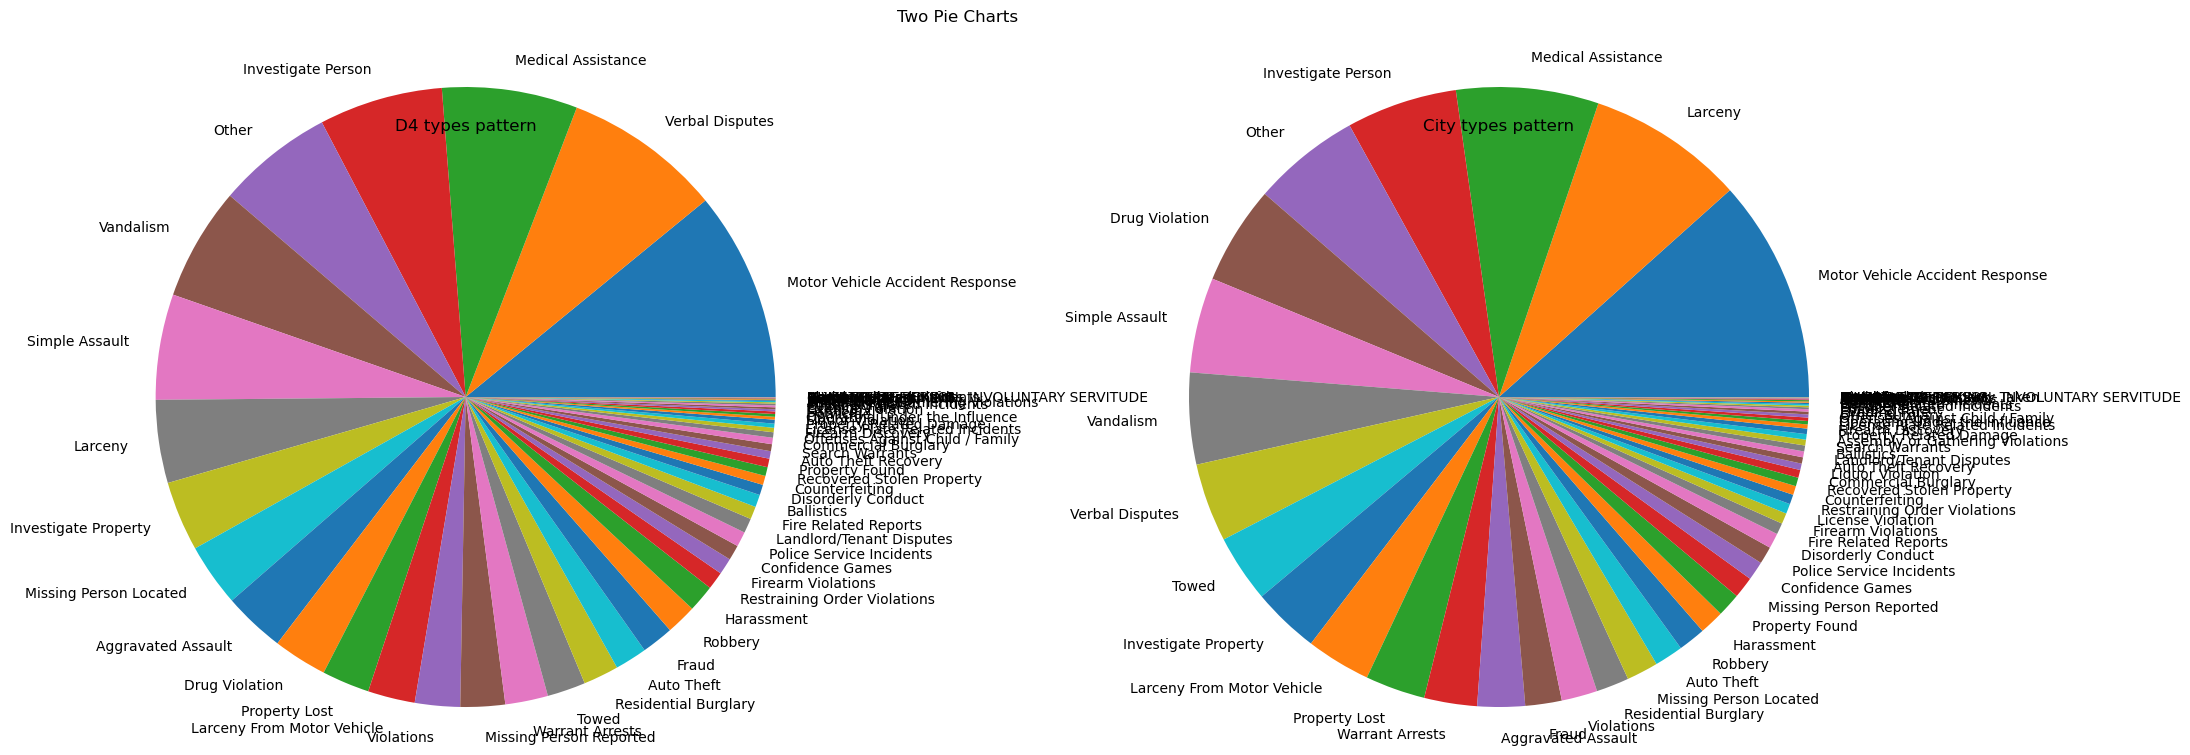

In [64]:
# print(crime_incident.OFFENSE_CODE_GROUP.value_counts())
import geopandas as gpd



distrcit_shape = gpd.read_file("../../data/City_Council_Districts_-_Effective_for_the_2023_Municipal_Election.geojson")

g_crime_incident = gpd.GeoDataFrame(crime_incident,geometry='geometry')
g_crime_incident = g_crime_incident.reset_index(drop=True)




d4area = distrcit_shape[distrcit_shape['DISTRICT']==4]



#d4 data stored inside filtered_gdf
d4_gdf = g_crime_incident[g_crime_incident.geometry.within(d4area.geometry.values[0])]
group=d4_gdf.OFFENSE_CODE_GROUP.value_counts()
group1=g_crime_incident.OFFENSE_CODE_GROUP.value_counts()


fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8))
fig.subplots_adjust(wspace=1,hspace=2)
ax1.pie(group,labels=group.index,radius=1.5)
ax1.set_title('D4 types pattern')


ax2.pie(group1,labels=group1.index,radius=1.5)
ax2.set_title('City types pattern')



fig.suptitle('Two Pie Charts')


plt.show()

From the above graph, the D4 has the following violence type pattern:

1.Motor vehicle accident
2.Verbal Disputes
3.Medical Assistance
4.Investigate Person
5.Other
6.Vandalism

The whole city has the following violence type pattern:

1.Motor vehicle accident
2.Larceny
3.Medical Assistance
4.Investigate Person
5.Other
6.Drug Violation

/var/folders/jc/ytj5cn2153v5xcrd3vd8mj600000gn/T/ipykernel_1821/2670023279.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shape.loc[:,col] = shape[col]/shape[col].sum()


Text(0.5, 0, 'District')

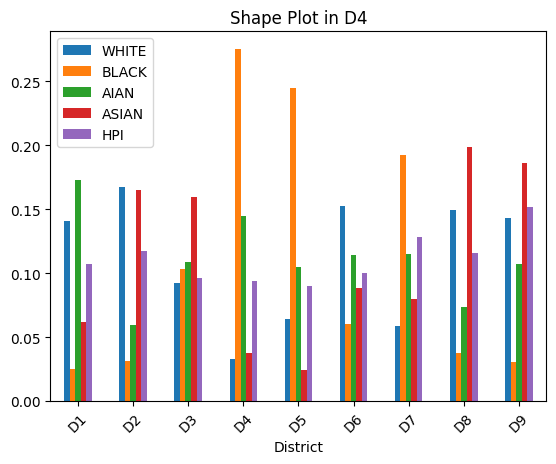

In [6]:
df_shape = shape[['SHORTNAME','TOTAL','TOTAL18','TOTALNH','WHITE', 'BLACK',
       'AIAN', 'ASIAN', 'HPI']]
for col in df_shape.columns[1:]:
    df_shape.loc[:,col] = shape[col]/shape[col].sum()
#temp.plot.bar(x = 'SHORTNAME', y = [lambda x: x/x.sum()])
df_shape.plot.bar(x='SHORTNAME',y = df_shape.columns[4:], rot = 45, title='Shape Plot in D4')

#TODO: solve warning
plt.xlabel('District')

We can see that the proportion of BLACK and MLTMN is relatively high, while the proportion of WHITE and ASIAN is relatively low in D4.

    Shootings Part
Based on the police map and district map in the "reference" folder, District 4 includes the B3, half of B2 and half of C11 in police district.

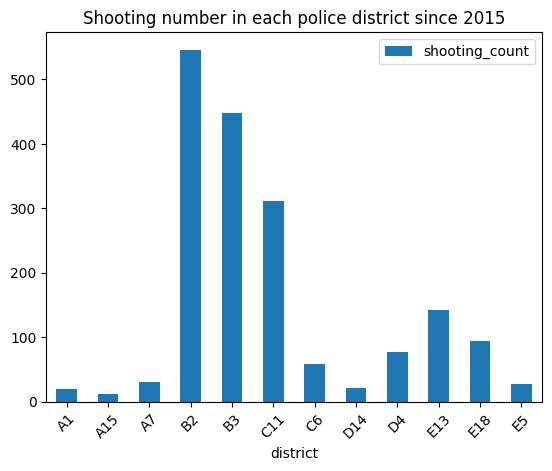

In [7]:
district_shooting_count = shootings.groupby('district').agg({'district': 'count'}).rename(columns={'district': 'shooting_count'}).reset_index()
district_shooting_count.plot.bar(x='district', y='shooting_count',rot = 45)
plt.title('Shooting number in each police district since 2015')
plt.show()

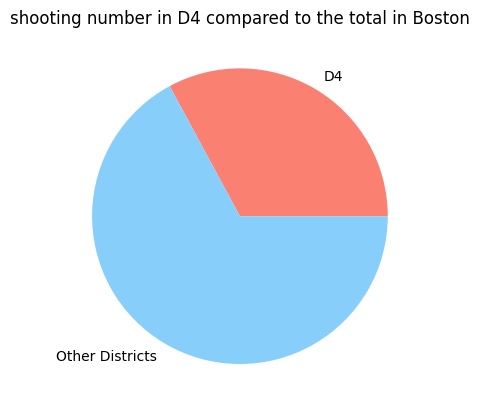

In [8]:
D4_shooting_count = 448 + 0.5 * 546 + 0.5 * 312
shooting_count = district_shooting_count['shooting_count'].sum()
plt.pie([D4_shooting_count,shooting_count], labels=['D4', 'Other Districts'], colors=['salmon', 'lightskyblue'])
plt.title('shooting number in D4 compared to the total in Boston')
plt.show()

#TODO: the ratio between the shooting count and the popultion in each district; the bar chart of shooting count in each district

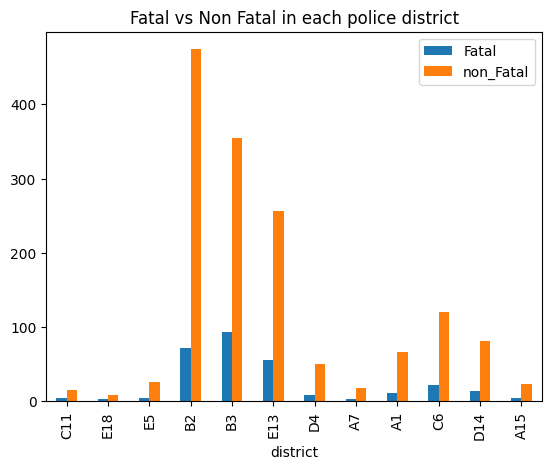

In [9]:
df_fnf = pd.DataFrame()
df_fnf['district'] = shootings['district'].unique()
df_fnf['Fatal']= shootings[shootings['shooting_type_v2'] == 'Fatal'].groupby(['district']).agg({'district': 'count'}).rename(columns={'district': 'x'}).reset_index()['x']
df_fnf['non_Fatal']= shootings[shootings['shooting_type_v2'] == 'Non-Fatal'].groupby(['district']).agg({'district': 'count'}).rename(columns={'district': 'x'}).reset_index()['x']
df_fnf.plot.bar(x='district')
plt.title('Fatal vs Non Fatal in each police district')
plt.show()

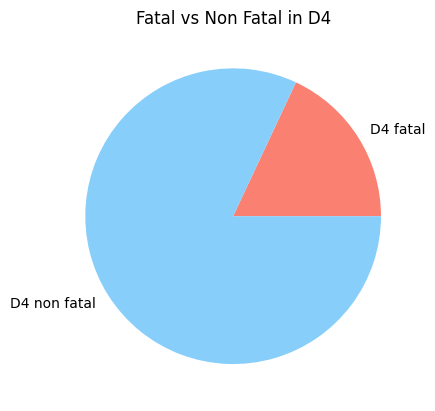

In [10]:
D4_fatal = 94 + 0.5*72 + 0.5*56
D4_nonFatal = 354 + 0.5*474 + 0.5*256
plt.pie([D4_fatal,D4_nonFatal], labels=['D4 fatal', 'D4 non fatal'], colors=['salmon', 'lightskyblue'])
plt.title('Fatal vs Non Fatal in D4')
plt.show()

#TODO: The bar chart in each district instead of polices districts

D4 analysis
Since the main police district in D4 is B3, we choose it for the following part, we can possibly improve our estimation by considering the rest part of police district in D4.

Non-Fatal    354
Fatal         94
Name: shooting_type_v2, dtype: int64


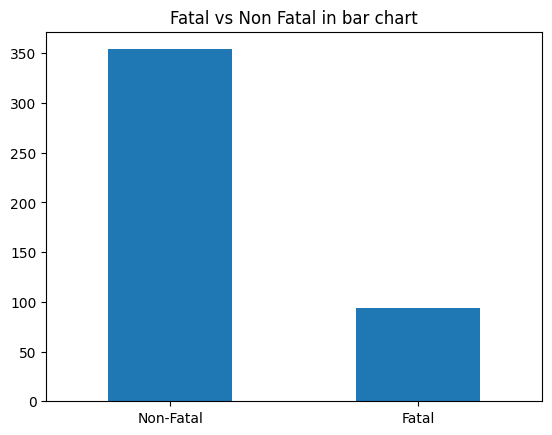

In [11]:
d4shooting=shootings.loc[shootings['district']=='B3',:]

type_stats=d4shooting['shooting_type_v2'].value_counts()
print(type_stats)
type_stats.plot(kind='bar',rot=0)
plt.title("Fatal vs Non Fatal in bar chart")
plt.show()

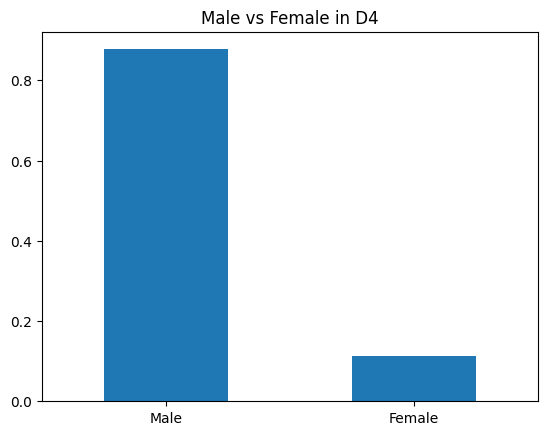

In [12]:
gender=(d4shooting['victim_gender'].value_counts()/d4shooting.shape[0]).plot(kind='bar',rot=0, title='Male vs Female in D4')


Above two images indicate that around 88% of the shooting events are non-Fatal and the ratio of male victim is much higher than the ratio of female victim.

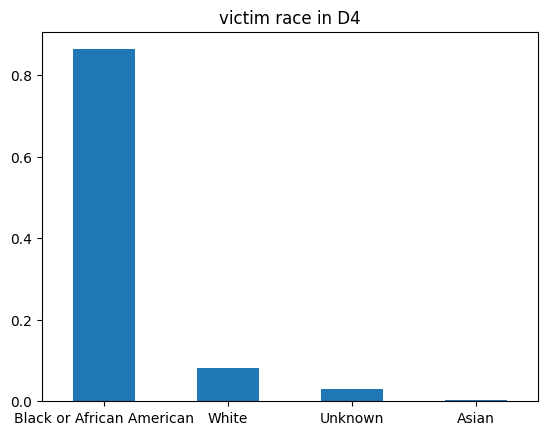

In [13]:
gender=(d4shooting['victim_race'].value_counts()/d4shooting.shape[0]).plot(kind='bar',rot=0, title='victim race in D4')


Based on the chart, the ratio of black or african american victim is much higher than the ratio of other victim.

    Violence/Crime Part
Similarly to the previous part, we use the police distrcit B3 so far, and we can possibly improve it by constructing a more close estimation.  

The observation shows that out of the total number of violence incidents, only 6 involved the use of guns, while 1339 incidents did not involve any gunshots.

In [56]:
import folium
import seaborn as sns
import geopandas as gpd
p_geo = gpd.read_file('../../data/Boston_Police_Stations.geojson')
distrcit_shape = gpd.read_file("../../data/City_Council_Districts_-_Effective_for_the_2023_Municipal_Election.geojson")

map_data=crime_incident.groupby('Location',as_index=False).size()
location=map_data.Location.str.replace("(","").str.replace(")","").str.split(",",expand=True)
map_data[['latitude','longitude']]=location
#print(map_data)
map_data.drop('Location',axis=1,inplace=True)
size = map_data.pop('size')
map_data.insert(2,'size',size)

#print(map_data)
base_map = Map(location=[42.33182960914501, -71.0734727352688], zoom_start=12)
HeatMap(map_data,cmap="crest").add_to(base_map)
temp = p_geo.to_crs(4326)

for i in range(len(temp)):
    folium.Circle(
        location=[temp.iloc[i]['CENTROIDY'],temp.iloc[i]['CENTROIDX']], 
        popup='Point 1A', radius=200, 
        weight=2, color='blue',
        fill=True,
        fill_color='blue'
        ).add_to(base_map)
style1 = {'fillColor': '#228B22', 'color': '#228B22'}
folium.GeoJson(distrcit_shape[distrcit_shape['DISTRICT']==4],style_function=lambda x:style1, name="geojson").add_to(base_map)
base_map.save('map.html')
base_map

/var/folders/jc/ytj5cn2153v5xcrd3vd8mj600000gn/T/ipykernel_1821/822236240.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  location=map_data.Location.str.replace("(","").str.replace(")","").str.split(",",expand=True)


From the heatmap, I observed that the east part of the district 4 has more violence.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot: >

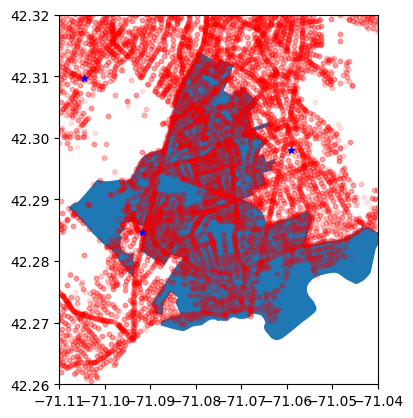

In [58]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
distrcit_shape = gpd.read_file("../../data/City_Council_Districts_-_Effective_for_the_2023_Municipal_Election.geojson")
# get the district 4 map
d4 = distrcit_shape[distrcit_shape['DISTRICT']==4]
# Convert the dataframe to a geopandas GeoDataFrame
geometry = gpd.points_from_xy(map_data.longitude, map_data.latitude)
locations_gdf = gpd.GeoDataFrame(map_data, geometry=geometry)
# print(locations_gdf)

# Plot the map with the locations
ax = d4.plot()
ax.set_xlim(-71.11, -71.04)
ax.set_ylim(42.26, 42.32)

# y = p_geo.loc[p_geo['geometry'].within(d4['geometry'].values[0])]
# y.plot(ax=ax, marker='o', color='b', markersize=5)
for i in range(9):
    x = locations_gdf.loc[locations_gdf['geometry'].within(distrcit_shape[distrcit_shape['DISTRICT']==i+1]['geometry'].values[0])]
    x.plot(ax=ax, marker='o', color='red', markersize=10, alpha = .1)
    y = p_geo.loc[p_geo['geometry'].within(distrcit_shape[distrcit_shape['DISTRICT']==i+1]['geometry'].values[0])]
    y.plot(ax=ax, marker='*', color='b', markersize=20)
    #TODO: Create circle
    # cir = plt.Circle(y['geometry'], radius=2, color='b', fill=False) # create circle around the point assigned
    # ax.add_patch(cir)
    
ax

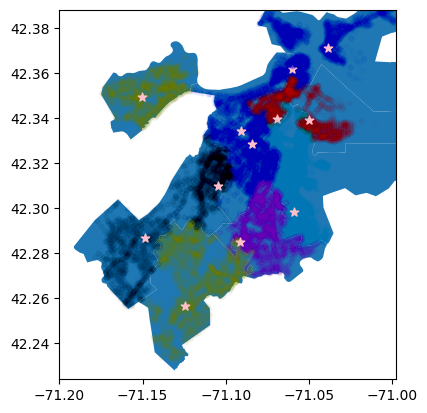

In [60]:
# Convert the dataframe to a geopandas GeoDataFrame
geometry = gpd.points_from_xy(map_data.longitude, map_data.latitude)
locations_gdf = gpd.GeoDataFrame(map_data, geometry=geometry)
# print(locations_gdf)

# Plot the map with the locations

ax = distrcit_shape.plot()
ax.set_xlim(-71.2,-70.998)
ax.set_ylim(42.224,42.388)
c = 'brcmykbbyb'
for i in range(9):
    x = locations_gdf.loc[locations_gdf['geometry'].within(distrcit_shape[distrcit_shape['DISTRICT']==i+1]['geometry'].values[0])]
    y = p_geo.loc[p_geo['geometry'].within(distrcit_shape[distrcit_shape['DISTRICT']==i+1]['geometry'].values[0])]
    
    x.plot(ax=ax, marker='o', color=c[i], markersize=10,alpha=0.01)
    y.plot(ax=ax, marker='*', color='pink', markersize=40)



In [44]:
#TODO: calculate the crime rate next to police station and those not
# radius can be 0.05
import math


r = 0.05

nearest_point_police_station = []
for i in range(len(p_geo)):
    p_lat = p_geo['CENTROIDY'][i]
    p_log = p_geo['CENTROIDX'][i]
    dist = np.transpose([map_data.latitude.astype('float'), map_data.longitude.astype('float')]) - [p_lat,p_log]
    dist = [np.linalg.norm(i) for i in dist]
    area_crime_num = [1 if (i<=r) else 0 for i in dist]
    nearest_point_police_station.append(sum(area_crime_num)/((r*r) * math.pi))
nearest_point_police_station.append(len(map_data)/sum(distrcit_shape.area))


/var/folders/jc/ytj5cn2153v5xcrd3vd8mj600000gn/T/ipykernel_1821/1947836085.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nearest_point_police_station.append(len(map_data)/sum(distrcit_shape.area))


<BarContainer object of 13 artists>

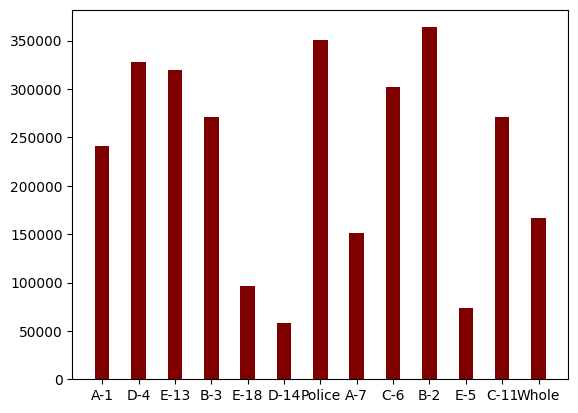

In [61]:
name = p_geo['NAME'].str.split(" ").str[1]
name = name.values

name = np.append(name,'Whole')
plt.bar(name, nearest_point_police_station, color ='maroon',
        width = 0.4)

The number of crime is not correlated with whether it is near a police station. And B-3 data do not show that most of the crime happen arround the police station

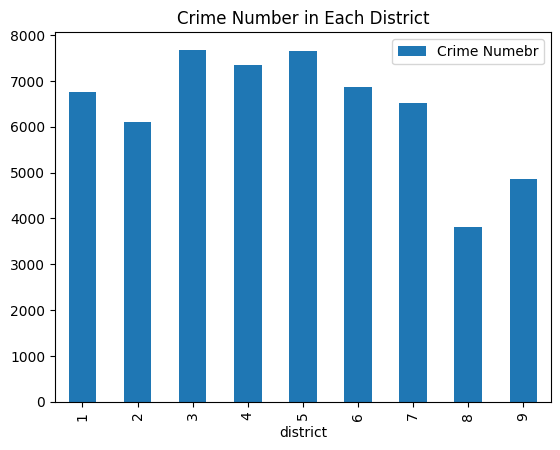

In [62]:
df_fnf = pd.DataFrame()
df_fnf['district'] = range(1,10)
temp = [len(locations_gdf.loc[locations_gdf['geometry'].within(distrcit_shape[distrcit_shape['DISTRICT']==i]['geometry'].values[0])]) for i in range(1,10)]
df_fnf['Crime Numebr']= temp
df_fnf.plot.bar(x='district')
plt.title('Crime Number in Each District')
plt.show()

The above figure shows that the violence happened the most in the middle part of the D4. We have to filter out the
violence of D4 in the future work.

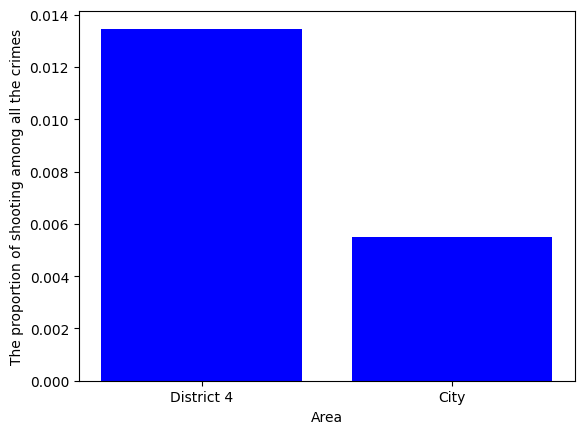

In [20]:
# calculate shooting crime proportion in each area
X = ["District 4","City"]
Y = [crime_incident[(crime_incident['DISTRICT']=='B3') & (crime_incident["SHOOTING"] == 1)].shape[0]/crime_incident[crime_incident['DISTRICT']=='B3'].shape[0],
    crime_incident[crime_incident["SHOOTING"]==1].shape[0]/crime_incident.shape[0]]

plt.bar(X,Y,color='b')
plt.xlabel('Area')
plt.ylabel('The proportion of shooting among all the crimes')
plt.show()
# crime_incident[(crime_incident['DISTRICT']=='D4')]["SHOOTING"].value_counts()

We can tell that District 4 has relatively large proportion of shooting crimes compared to the whole city.

In [21]:
crime_incident[crime_incident['DISTRICT']=='B3']["SHOOTING"].value_counts()

0    32630
1      991
Y      311
Name: SHOOTING, dtype: int64

Similarly, shooting has only 2.5% share of all the crimes in D4.

In [70]:
# heat map for thee whole city crime

map_data2=crime_incident.groupby(['Lat', 'Long'], as_index=False).size()

base_map_whole_city = Map(location=[42.33182960914501, -71.0734727352688], zoom_start=12)
HeatMap(map_data2).add_to(base_map_whole_city)

#set markers for shooting ones.
crime_incident_shooting = crime_incident[crime_incident["SHOOTING"]==1]

for index, row in crime_incident_shooting.iterrows():
    tooltip = f"{row['OFFENSE_CODE']} ({row['INCIDENT_NUMBER']} incident)"
    if not np.isnan(row['Lat']) and not np.isnan(row['Long']):
        Marker(location=[row['Lat'], row['Long']], tooltip=tooltip).add_to(base_map_whole_city)

base_map_whole_city.save('../../data/crime_map_whole_city.html')
base_map_whole_city

In [73]:
shooting_heatmap = Map(location=[42.33182960914501, -71.0734727352688], zoom_start=12)
HeatMap(crime_incident_shooting.groupby(['Lat', 'Long'], as_index=False).size()).add_to(shooting_heatmap)

temp = p_geo.to_crs(4326)

for i in range(len(temp)):
    folium.Circle(
        location=[temp.iloc[i]['CENTROIDY'],temp.iloc[i]['CENTROIDX']], 
        popup='Point 1A', radius=200, 
        weight=2, color='blue',
        fill=True,
        fill_color='blue'
        ).add_to(shooting_heatmap)
style1 = {'fillColor': '#228B22', 'color': '#228B22'}
folium.GeoJson(distrcit_shape[distrcit_shape['DISTRICT']==4],style_function=lambda x:style1, name="geojson").add_to(shooting_heatmap)


shooting_heatmap.save('../../data/shooting_heatmap.html')
shooting_heatmap

In [63]:
crime_incident_shooting_valied = crime_incident_shooting[crime_incident_shooting['Lat'].notna()]
crime_incident_shooting_valied

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
478        I152050036           413  Aggravated Assault   
479        I152050036           413  Aggravated Assault   
480        I152050036           413  Aggravated Assault   
1296       I152050961           413  Aggravated Assault   
1328       I152051161          3125     Warrant Arrests   
...               ...           ...                 ...   
12151       232017019           111                 NaN   
12267       232017149          2662                 NaN   
12611       232017654          3114                 NaN   
12836       232017984           423                 NaN   
12967       232018166          3114                 NaN   

                      OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA  SHOOTING  \
478        ASSAULT - AGGRAVATED - BATTERY       B2            326         1   
479        ASSAULT - AGGRAVATED - BATTERY       B2            326         1   
480        ASSAULT - AGGRAVATED - BATTERY       B2            326         1   
1296       ASSAULT - AGGRAVATED - BATTERY       B2            286         1   
1328                       WARRANT ARREST       B2            238         1   
...                                   ...      ...            ...       ...   
12151  MURDER, NON-NEGLIGENT MANSLAUGHTER       B2                        1   
12267           BALLISTICS EVIDENCE/FOUND      C11                        1   
12611                INVESTIGATE PROPERTY       B3                        1   
12836                ASSAULT - AGGRAVATED       B3                        1   
12967                INVESTIGATE PROPERTY      C11                        1   

             OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
478       2015-06-16 20:41:00  2015      6     Tuesday    20    Part One   
479       2015-06-16 20:41:00  2015      6     Tuesday    20    Part One   
480       2015-06-16 20:41:00  2015      6     Tuesday    20    Part One   
1296      2015-06-19 21:20:00  2015      6      Friday    21    Part One   
1328      2015-06-20 00:00:00  2015      6    Saturday     0  Part Three   
...                       ...   ...    ...         ...   ...         ...   
12151  2023-03-04 15:31:00+00  2023      3    Saturday    15         NaN   
12267  2023-03-05 04:41:00+00  2023      3      Sunday     4         NaN   
12611  2023-03-07 03:39:00+00  2023      3     Tuesday     3         NaN   
12836  2023-03-08 10:38:00+00  2023      3   Wednesday    10         NaN   
12967  2023-03-08 21:01:00+00  2023      3   Wednesday    21         NaN   

                                                  STREET        Lat  \
478                                         LAWRENCE AVE  42.311611   
479                                         LAWRENCE AVE  42.311611   
480                                         LAWRENCE AVE  42.311611   
1296                                            KERR WAY  42.333584   
1328                                           DUDLEY ST  42.317808   
...                                                  ...        ...   
12151                                         WEAVER WAY  42.321406   
12267                                        COLUMBIA RD  42.309692   
12611  BLUE HILL AVE & WESTVIEW ST\nDORCHESTER  MA 02...  42.291168   
12836                                       THETFORD AVE  42.284660   
12967                                      WAINWRIGHT ST  42.290396   

            Long                                  Location  
478   -71.076256               (42.31161123, -71.07625600)  
479   -71.076256               (42.31161123, -71.07625600)  
480   -71.076256               (42.31161123, -71.07625600)  
1296  -71.085543               (42.33358389, -71.08554259)  
1328  -71.066850               (42.31780762, -71.06684990)  
...          ...                                       ...  
12151 -71.095968  (42.321406106155784, -71.09596828807624)  
12267 -71.072859    (42.3096916863878, -71.07285868191235)  
12611 -71.089056    (42.291167964

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot: >

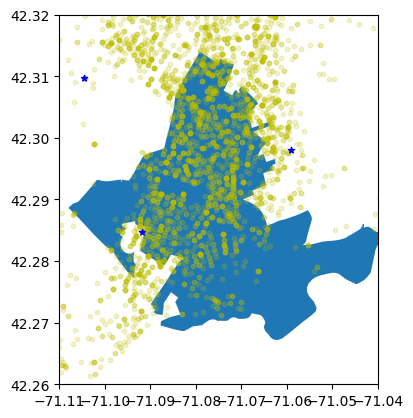

In [67]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

size = map_data2.pop('size')
map_data2.insert(2,'size',size)

# get the district 4 map
d4 = distrcit_shape[distrcit_shape['DISTRICT']==4]
# Convert the dataframe to a geopandas GeoDataFrame
# geometry = gpd.points_from_xy(map_data.longitude, map_data.latitude)
# locations_gdf = gpd.GeoDataFrame(map_data, geometry=geometry)
shooting_geometry = gpd.points_from_xy(crime_incident_shooting_valied.Long, crime_incident_shooting_valied.Lat)
shooting_locations_gdf = gpd.GeoDataFrame(crime_incident_shooting_valied, geometry=shooting_geometry)

# Plot the map with the locations
ax = d4.plot()
ax.set_xlim(-71.11, -71.04)
ax.set_ylim(42.26, 42.32)

# y = p_geo.loc[p_geo['geometry'].within(d4['geometry'].values[0])]
# y.plot(ax=ax, marker='o', color='b', markersize=5)
for i in range(9):
    # x = locations_gdf.loc[locations_gdf['geometry'].within(distrcit_shape[distrcit_shape['DISTRICT']==i+1]['geometry'].values[0])]
    # x.plot(ax=ax, marker='o', color='red', markersize=10, alpha = .01)
    
    z = shooting_locations_gdf.loc[shooting_locations_gdf['geometry'].within(distrcit_shape[distrcit_shape['DISTRICT']==i+1]['geometry'].values[0])]
    z.plot(ax=ax, marker='o', color='y', markersize=10, alpha = .2)
    
    y = p_geo.loc[p_geo['geometry'].within(distrcit_shape[distrcit_shape['DISTRICT']==i+1]['geometry'].values[0])]
    y.plot(ax=ax, marker='*', color='b', markersize=20)
    #TODO: Create circle
    # cir = plt.Circle(y['geometry'], radius=2, color='b', fill=False) # create circle around the point assigned
    # ax.add_patch(cir)
    
ax

We can see the shooting violence focus mainly on D4.

In [23]:
crime_d4 = crime_incident[crime_incident["DISTRICT"]=="B3"]

map_data_d4 = crime_d4.groupby(['Lat', 'Long'], as_index=False).size()

base_map_d4 = Map(location=[42.33182960914501, -71.0734727352688], zoom_start=12)
HeatMap(map_data_d4).add_to(base_map_d4)

#set markers for shooting ones.
crime_incident_shooting_d4 = crime_d4[crime_d4["SHOOTING"]==1]

for index, row in crime_incident_shooting_d4.iterrows():
    tooltip = f"{row['OFFENSE_CODE']} ({row['INCIDENT_NUMBER']} incident)"
    if not np.isnan(row['Lat']) and not np.isnan(row['Long']):
        Marker(location=[row['Lat'], row['Long']], tooltip=tooltip).add_to(base_map_d4)

base_map_d4.save('../../data/crime_map_d4.html')
base_map_d4

In terms of D4, shooting crime mainly happened in the northern part, which get closer to the city area

    School Discipline Part

In [24]:
D4_school = ['04380000', '35050000', '04630000', '04280000']
D4_disc = disciplines[disciplines['District Code'].isin(D4_school)]
D4_disc.head()

0                                        District Name District Code  \
57                    Brooke Charter School (District)      04280000   
76            Codman Academy Charter Public (District)      04380000   
171      KIPP Academy Boston Charter School (District)      04630000   
361  UP Academy Charter School of Dorchester (Distr...      35050000   

0    Students Students Disciplined % In-School Suspension  \
57      2,238                  217                    5.0   
76        362                   12                    0.0   
171       634                   16                    0.3   
361       674                   57                    1.5   

0   % Out-of-School Suspension % Expulsion % Removed to Alternate Setting  \
57                         6.8         0.1                            0.0   
76                         3.3         0.0                            0.0   
171                        2.2         0.0                            0.0   
361                        7.1         0.0                            0.0   

0   % Emergency Removal % Students with a School-Based Arrest  \
57                  0.1                                   0.0   
76                  0.0                                   0.0   
171                 0.2                                   0.0   
361                 1.3                                   0.0   

0   % Students with a Non-Arrest Law Enforcement Referral  
57                                                 0.0     
76                                                 0.0     
171                                                0.0     
361                                                0.0

    Firearms Transactions Part

In [25]:
licenses.head()
#TODO: same problems in discipline, trying to distinguish the district

Licensing Authority                                       License Type  \
0         ABINGTON PD                       Firearms Identification Card   
1         ABINGTON PD  Resident Class A Large Capacity License to Car...   
2         ABINGTON PD          Resident License to Possess a Machine Gun   
3            ACTON PD                       Firearms Identification Card   
4            ACTON PD  Resident Class A Large Capacity License to Car...   

   Count  
0     41  
1   1524  
2      4  
3     64  
4   1034

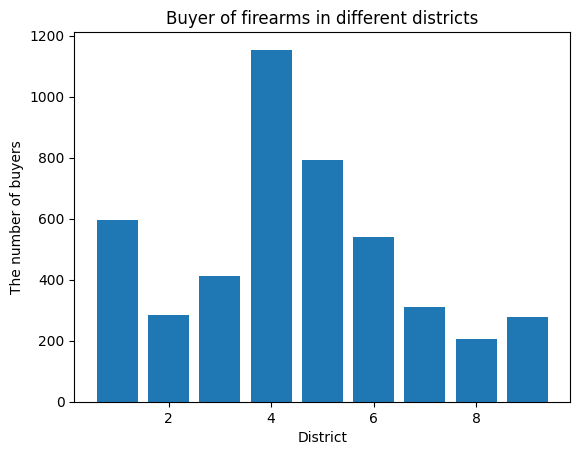

In [26]:
# Zipcode dictionary based on the district map and zipcode map in the "reference"
zipcode_dict = {}
zipcode_dict[1] = [2113.0, 2129.0, 2128.0, 2151.0]
zipcode_dict[2] = [2203.0, 2109.0, 2110.0, 2111.0, 2210.0, 2127.0]
zipcode_dict[3] = [2125.0, 2122.0]
zipcode_dict[4] = [2121.0, 2124.0, 2126.0, 2131.0, 2130.0]
zipcode_dict[5] = [2136.0, 2126.0, 2131.0]
zipcode_dict[6] = [2130.0, 2467.0, 2132.0]
zipcode_dict[7] = [2118.0, 2119.0, 2120.0]
zipcode_dict[8] = [2215.0, 2199.0, 2116.0, 2114.0, 2108.0]
zipcode_dict[9] = [2467.0, 2135.0, 2134.0, 2163.0]

buyer_count = [transactions['BUYER ZIP'].isin(zipcode_dict[x]).sum() for x in zipcode_dict]
plt.bar(range(1,10), buyer_count)
plt.title("Buyer of firearms in different districts")
plt.xlabel('District')
plt.ylabel('The number of buyers')
plt.show()


Based on the plot, we found the buyer of guns is highest in District 4 compared to other districts, which can be one of the drivers of violence in District 4.